In [55]:
# Scikit-Learn and Shallow Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import ElasticNet
from sklearn import metrics



# Data manipulation and processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split


In [56]:
# load the csv dataset
file_path="C:\\Users/nisha/Documents/Final_Project/Deliverable_1_Triangle/Images/AmesHousing.csv"
housing_df=pd.read_csv(file_path)
housing_df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [57]:
housing_df.columns


Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [58]:
# We can drop the ID column as well as the order as the information is not necessary for our dataset 

df = pd.read_csv("C:\\Users/nisha/Documents/Final_Project/Deliverable_1_Triangle/Images/AmesHousing.csv")
df.drop(['Order', 'PID'], axis=1, inplace=True)


NameError: name 'histplot' is not defined

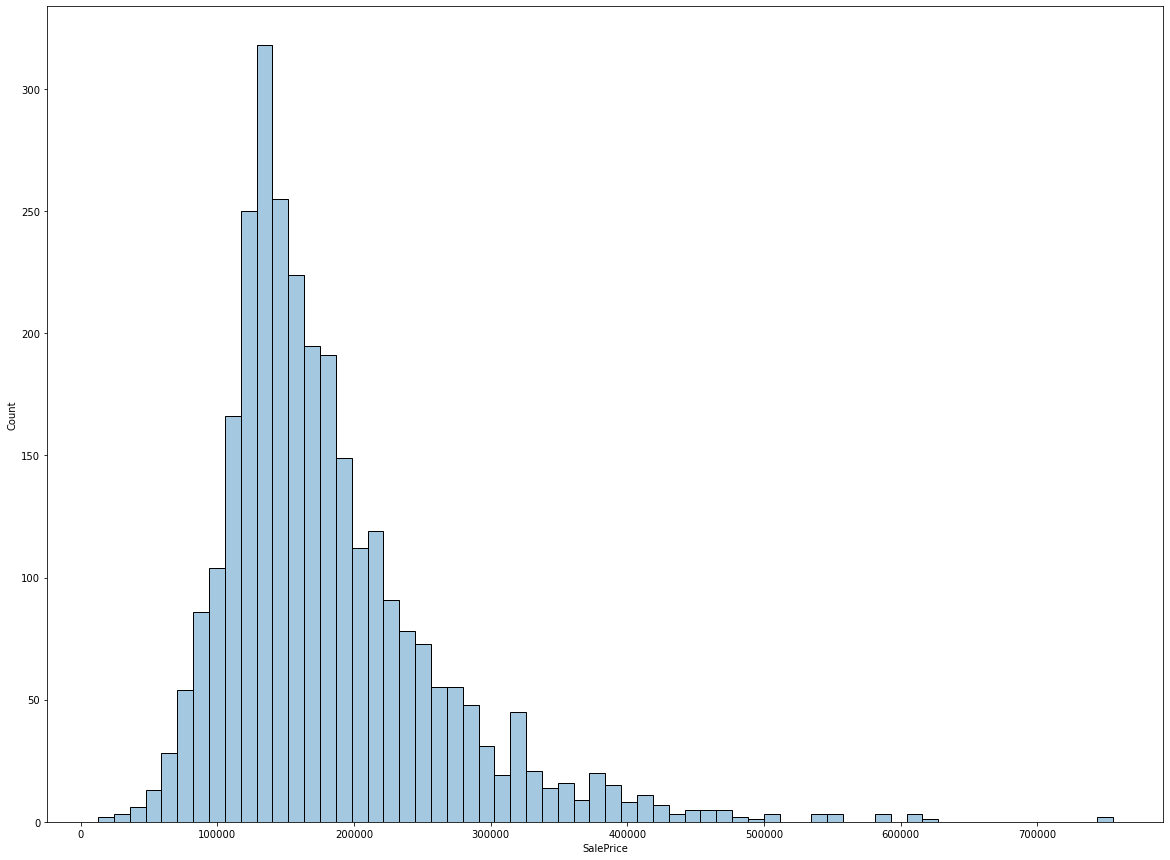

In [59]:
# We can analyze the distribution of the various sales prices on our home dataset 
fig, ax = plt.subplots(figsize=(20,15))
sns.histplot(x=df['SalePrice'], kde=False, ax=ax, alpha=0.4)
histplot.set(title = "Sale Prices in Ames Housing")

In [ ]:
# Boxplot 

sns.boxplot(x=df["SalePrice"])


In [60]:
# Description of the Interquartile ranges 

print(df['SalePrice'].describe())

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [61]:
# We could further inspect outliers (this is something to explore over the next deliverable)
# Use heatmap or another way to show correaltion

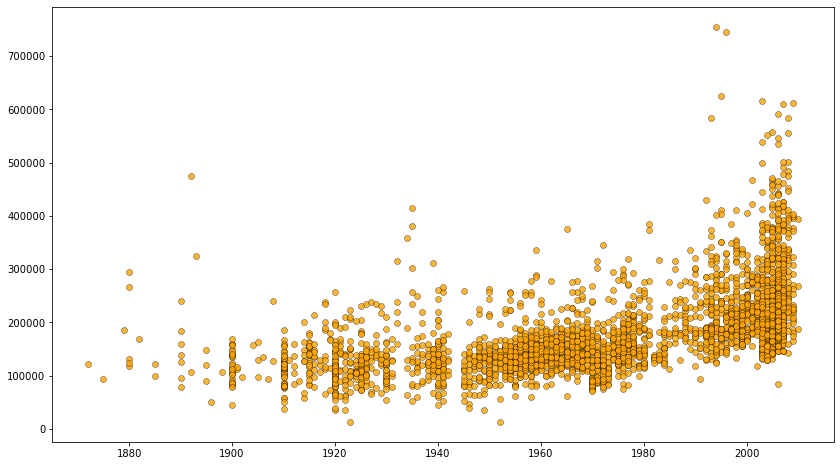

In [62]:
# Examining Correlation amongst features: 

fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(
    x=df['Year Built'],
    y=df['SalePrice'],
    color='orange',
    edgecolors='black',
    linewidths=0.4,
    alpha=0.8,
    )

plt.show()


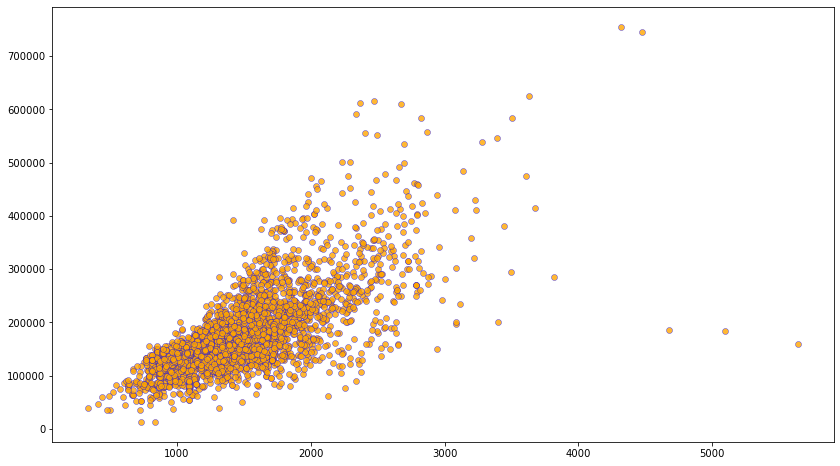

In [63]:
# Living Area vs Sales Price 

fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(
    x=df['Gr Liv Area'],
    y=df['SalePrice'],
    color='orange',
    edgecolors='blue',
    linewidths=0.4,
    alpha=0.8,
    )

plt.show()


In [64]:
# DataPreprocessing:  

# Importance behind Data Preprocessing in our specfic scenario: 
# We might not have houses being sold in a normal condition
# We can have houses that might have had rush sales due to owner requiring money quickly
# We can have data missing for specific features which can skew our results

# Steps to tackle these issues: 
# 1. Identifying Missing Values 
# 2. Decide on what to do with the Missing Values, either remove column/rows or replace with mean value 
# 3. One-Hot Encoding of Categorical Variables ( we will turn our categorical variables in our numerical data type)
# 4. Observing Variable datatypes captured by Pandas, sometimes they provide incorrect data variable type 
# 5. Splitting our data into X_train, X_test, y_train & y_test 
# 6. Standardizing our variable except the target variable 


# exploring data, did you see any trend? 
# what sort of analysis are you doing?

In [65]:
# Identifying the Number of Missing Values 

missing_values = pd.DataFrame({
    'Column': df.columns.values,
    'Number of Missing Value': df.isna().sum().values,
    'Missing Value %': 100 * df.isna().sum().values / len(df),})

missing_values = missing_values[missing_values['Number of Missing Value'] > 0]
print(missing_values.sort_values(by='Number of Missing Value').reset_index(drop=True))

            Column  Number of Missing Value  Missing Value %
0       Electrical                        1         0.034130
1      Garage Area                        1         0.034130
2    Total Bsmt SF                        1         0.034130
3      Bsmt Unf SF                        1         0.034130
4     BsmtFin SF 1                        1         0.034130
5     BsmtFin SF 2                        1         0.034130
6      Garage Cars                        1         0.034130
7   Bsmt Full Bath                        2         0.068259
8   Bsmt Half Bath                        2         0.068259
9     Mas Vnr Area                       23         0.784983
10    Mas Vnr Type                       23         0.784983
11  BsmtFin Type 1                       80         2.730375
12       Bsmt Qual                       80         2.730375
13       Bsmt Cond                       80         2.730375
14  BsmtFin Type 2                       81         2.764505
15   Bsmt Exposure      

In [66]:
# Identifying the Number of Missing Values - Remove Missing Values with a higher percentage than 80% 

df.drop(['Fence', 'Alley', 'Misc Feature', 'Pool QC'], axis=1, inplace=True)



In [67]:
# We must decide what we are going to do with all the other variables that have missing values and identify whether the variables are categorical or numerical 

cols_with_missing_values = df.columns[df.isna().sum() > 0]
for col in cols_with_missing_values:

# Print Info 
    
print(col)
print(df[col].unique()[:5])

Lot Frontage
[141.  80.  81.  93.  74.]
Mas Vnr Type
['Stone' 'None' 'BrkFace' nan 'BrkCmn']
Mas Vnr Area
[112.   0. 108.  20. 603.]
Bsmt Qual
['TA' 'Gd' 'Ex' nan 'Fa']
Bsmt Cond
['Gd' 'TA' nan 'Po' 'Fa']
Bsmt Exposure
['Gd' 'No' 'Mn' 'Av' nan]
BsmtFin Type 1
['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf']
BsmtFin SF 1
[ 639.  468.  923. 1065.  791.]
BsmtFin Type 2
['Unf' 'LwQ' 'BLQ' 'Rec' nan]
BsmtFin SF 2
[   0.  144. 1120.  163.  168.]
Bsmt Unf SF
[ 441.  270.  406. 1045.  137.]
Total Bsmt SF
[1080.  882. 1329. 2110.  928.]
Electrical
['SBrkr' 'FuseA' 'FuseF' 'FuseP' nan]
Bsmt Full Bath
[ 1.  0.  2.  3. nan]
Bsmt Half Bath
[ 0.  1. nan  2.]
Fireplace Qu
['Gd' nan 'TA' 'Po' 'Ex']
Garage Type
['Attchd' 'BuiltIn' 'Basment' 'Detchd' nan]
Garage Yr Blt
[1960. 1961. 1958. 1968. 1997.]
Garage Finish
['Fin' 'Unf' 'RFn' nan]
Garage Cars
[2. 1. 3. 0. 4.]
Garage Area
[528. 730. 312. 522. 482.]
Garage Qual
['TA' nan 'Fa' 'Gd' 'Ex']
Garage Cond
['TA' nan 'Fa' 'Gd' 'Ex']


In [68]:
# Train & Test Split onto the missing values

train_df, test_df = train_test_split(df, test_size=0.2)


In [69]:
# Replacing the values of our numerical values 

num_with_missing = ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 
                    'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 
                    'Garage Yr Blt', 'Garage Cars', 'Garage Area']

for n_col in num_with_missing:
    train_df[n_col] = train_df[n_col].fillna(train_df[n_col].mean())
    test_df[n_col] = test_df[n_col].fillna(test_df[n_col].mean())

In [70]:
# Replacing the values of our categorical values

cat_with_missing = [x for x in cols_with_missing_values if x not in num_with_missing]

for c_col in cat_with_missing:
    train_df[c_col] = train_df[c_col].fillna(train_df[c_col].mode().to_numpy()[0])
    test_df[c_col] = test_df[c_col].fillna(test_df[c_col].mode().to_numpy()[0])
    
    
# Our dataset should not have any more missing variables at this point, we can run a code to double check if this is true


In [71]:
df.isna().sum()

# ERROR spotted on LOT FRONTAGE Feature (figure out why this error is arising)

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 76, dtype: int64

In [99]:
# Checking our Variables Data Types & Confirm whether Pandas is reading any of these variables incorrectly 
data_types = pd.DataFrame({
    'Column': train_df.select_dtypes(exclude='object').columns.values,
    'Data type': train_df.select_dtypes(exclude='object').dtypes.values})

print(data_types)

                  Column Data type
0             1st Flr SF     int64
1             2nd Flr SF     int64
2          Bedroom AbvGr     int64
3              Full Bath     int64
4            Garage Area   float64
5            Gr Liv Area     int64
6              Half Bath     int64
7          Kitchen AbvGr     int64
8               Lot Area     int64
9           Lot Frontage   float64
10           MS SubClass     int64
11     MS Zoning_A (agr)     uint8
12     MS Zoning_C (all)     uint8
13          MS Zoning_FV     uint8
14     MS Zoning_I (all)     uint8
15          MS Zoning_RH     uint8
16          MS Zoning_RL     uint8
17          MS Zoning_RM     uint8
18  Neighborhood_Blmngtn     uint8
19  Neighborhood_Blueste     uint8
20   Neighborhood_BrDale     uint8
21  Neighborhood_BrkSide     uint8
22  Neighborhood_ClearCr     uint8
23  Neighborhood_CollgCr     uint8
24  Neighborhood_Crawfor     uint8
25  Neighborhood_Edwards     uint8
26  Neighborhood_Gilbert     uint8
27   Neighborhood_Gr

In [101]:
# Perform One Hot Encoding 

accepted_vars = ['MS SubClass', 'Lot Frontage', 'Lot Area',
                 'Overall Qual', 'Overall Cond',
                 'Year Built', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
                 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 
                 'Kitchen AbvGr', 'TotRms AbvGrd', 'Garage Area', 
                 'Pool Area']

train_df = train_df[accepted_vars]
test_df = test_df[accepted_vars] 

In [125]:
train_df = pd.get_dummies(train_df).reset_index(drop=True)
test_df = pd.get_dummies(test_df).reset_index(drop=True)



In [126]:
print(test_df)

     MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0             20      68.70935      9819             5             5   
1             20      98.00000     12704             8             5   
2             20      60.00000     10122             4             6   
3             20      68.70935     12493             4             5   
4             20      70.00000      7000             5             6   
..           ...           ...       ...           ...           ...   
581           20      65.00000      6500             6             6   
582           60      65.00000      8450             6             5   
583           20      68.70935     11500             6             6   
584           20     129.00000     16737             9             5   
585           20      83.00000     11980             7             5   

     Year Built  Total Bsmt SF  1st Flr SF  2nd Flr SF  Gr Liv Area  \
0          1967          882.0         900           0          

In [127]:
print (train_df)

      MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0              50     60.000000      5520             5             7   
1              20     70.000000      8050             5             6   
2              50     60.000000      8064             6             6   
3              20     69.354723     10750             8             5   
4             120     57.000000      8013             8             5   
...           ...           ...       ...           ...           ...   
2339           80     75.000000     13860             8             7   
2340           20     69.354723     11717             6             6   
2341           60     77.000000      9206             6             5   
2342           20     76.000000      6950             5             7   
2343           60    105.000000     11025             8             5   

      Year Built  Total Bsmt SF  1st Flr SF  2nd Flr SF  Gr Liv Area  \
0           1920          565.0         565        

In [128]:
# Split Data :
# X_train - X_test - y_train - y_test

X_train, y_train = train_df, train_df.pop('SalePrice')
X_test, y_test = test_df, test_df.pop('SalePrice')

KeyError: 'SalePrice'

In [129]:
print (test_df.pop)

<bound method DataFrame.pop of      MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0             20      68.70935      9819             5             5   
1             20      98.00000     12704             8             5   
2             20      60.00000     10122             4             6   
3             20      68.70935     12493             4             5   
4             20      70.00000      7000             5             6   
..           ...           ...       ...           ...           ...   
581           20      65.00000      6500             6             6   
582           60      65.00000      8450             6             5   
583           20      68.70935     11500             6             6   
584           20     129.00000     16737             9             5   
585           20      83.00000     11980             7             5   

     Year Built  Total Bsmt SF  1st Flr SF  2nd Flr SF  Gr Liv Area  \
0          1967          882.0   

In [130]:
print (train_df.pop)

<bound method DataFrame.pop of       MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0              50     60.000000      5520             5             7   
1              20     70.000000      8050             5             6   
2              50     60.000000      8064             6             6   
3              20     69.354723     10750             8             5   
4             120     57.000000      8013             8             5   
...           ...           ...       ...           ...           ...   
2339           80     75.000000     13860             8             7   
2340           20     69.354723     11717             6             6   
2341           60     77.000000      9206             6             5   
2342           20     76.000000      6950             5             7   
2343           60    105.000000     11025             8             5   

      Year Built  Total Bsmt SF  1st Flr SF  2nd Flr SF  Gr Liv Area  \
0           1920    

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
print(X_train)

[[-1.52692948  0.72164218  0.17779103 ... -0.2982825  -1.11235419
  -1.71664371]
 [-0.13954265 -0.79109586  0.17779103 ... -0.94268267 -0.23990904
  -0.15826008]
 [-0.87675189  0.37308503  0.17779103 ... -0.94268267 -0.6511397
  -0.78824495]
 ...
 [-0.47231071  0.96330847  0.17779103 ...  0.34611767 -0.7124835
   0.4385677 ]
 [-0.63357523 -0.79109586 -1.04432679 ... -0.94268267 -0.31942878
   0.23962511]
 [ 0.91763588  2.24367507  0.17779103 ...  1.634918    0.63480811
   0.67066739]]


In [133]:
print(X_test)

[[-0.66941179 -0.79109586  0.17779103 ... -0.94268267 -0.39213254
  -0.15826008]
 [ 2.25382763 -0.79109586  0.17779103 ...  0.99051783  2.24337887
   1.20118096]
 [-0.74876417 -0.79109586 -2.26644461 ... -2.231483   -2.39603001
  -0.78824495]
 ...
 [ 1.23248566 -0.79109586 -1.04432679 ... -0.2982825   0.28946524
  -0.19141717]
 [ 2.09512287 -0.79109586  0.17779103 ...  0.99051783  2.10251533
   1.06855257]
 [ 0.69493726 -0.79109586 -2.26644461 ... -1.58708283  0.85973538
   0.50488189]]


In [134]:
### Using our Deliverable ML_model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing


In [135]:
# Initialize our Shallow Learning Regressors from Scikit-Learn 

linear_regressor = LinearRegression()
dtr = DecisionTreeRegressor() 
forest = RandomForestRegressor()

In [136]:
# Fitting our Regressors: 

linear_regressor.fit(X_train, y_train) 
dtr.fit(X_train, y_train) 
forest.fit(X_train, y_train) 

RandomForestRegressor()

In [137]:
# Making predictions on the test set
y_pred_linear = linear_regressor.predict(X_test) 
y_pred_dtr = dtr.predict(X_test) 
y_pred_forest = forest.predict(X_test)

In [138]:
print('LinearRegressor Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('LinearRegressor Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))
print('LinearRegressor Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))

print('\n')

print('DTR Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dtr))
print('DTR Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_dtr))
print('DTR Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtr)))


print('\n')

print('RFR Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_forest))
print('RFR Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_forest))
print('RFR Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest)))

LinearRegressor Mean Absolute Error: 19458.63861196921
LinearRegressor Mean Squared Error: 1195638826.0529428
LinearRegressor Root Mean Squared Error: 34578.01073012938


DTR Mean Absolute Error: 22969.129692832765
DTR Mean Squared Error: 1114816159.9590445
DTR Root Mean Squared Error: 33388.86281320531


RFR Mean Absolute Error: 16015.96819592069
RFR Mean Squared Error: 630768598.5679952
RFR Root Mean Squared Error: 25115.10697902749


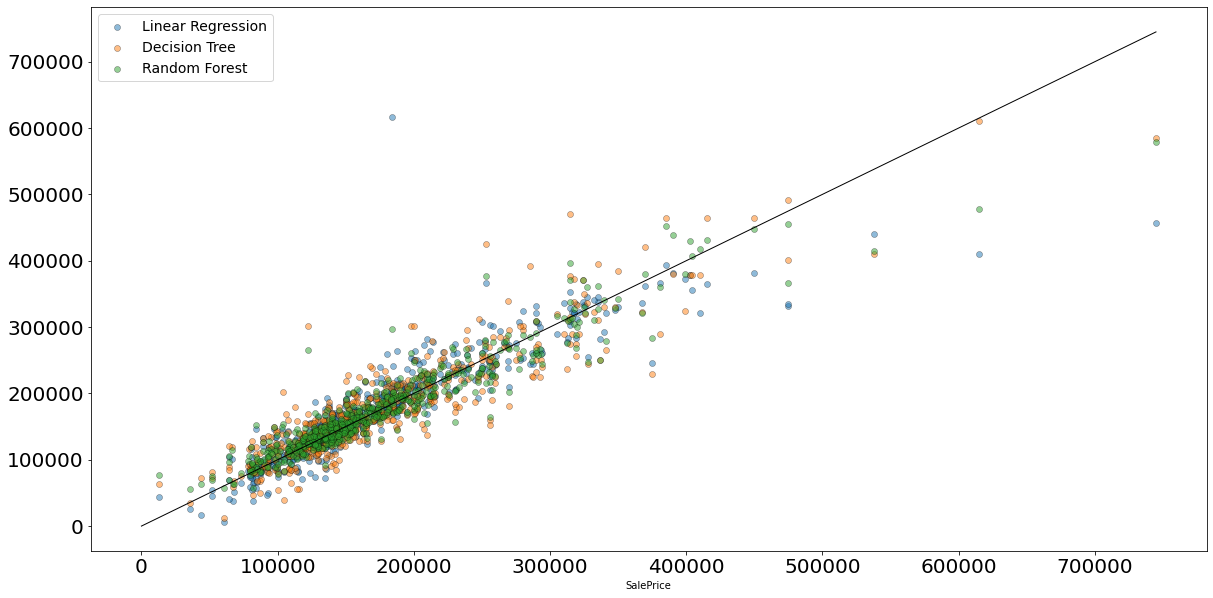

In [139]:
## Would be a great visual for our dashboard in telling our story and why we chose our decision

# We would want to visualize the predicted values in comparison to the real values in the test set: 

fig, ax = plt.subplots(figsize=(20,10)) 

# Scatterplots of predictions
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.5, lw=1, ec='black', ax=ax, label='Linear Regression')
sns.scatterplot(x=y_test, y=y_pred_dtr, alpha=0.5, lw=1, ec='black', ax=ax, label='Decision Tree')
sns.scatterplot(x=y_test, y=y_pred_forest, alpha=0.5, lw=1, ec='black', ax=ax, label='Random Forest')

# Diagonal reference line
lims = [0, max(y_test.max(), y_test.max())]
plt.plot(lims, lims, lw=1, color='black')


# Visual: 
# Diagonal reference line
lims = [0, max(y_test.max(), y_test.max())]

# Legend and tick styling
plt.legend(prop={'size': 14})
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [141]:
# Decide on Loss Function:

# 1. Mean Absolute Error (MAE) 
# 2. Mean Squared Error (MSE) 
# 3. Root Mean Squared Error (RMSE)
# 4. Mean Absolute Percentage Error (MAPE)

# Importance of Loss Function Decision: The metric that we use will let us know whether our model is doing well or not, and then we align the metric to the loss function
# Training a simple neural network  and compare our loss function selection

In [142]:
# From our preliminary model we are able to see that Random Forest provides the most accurate results 
# For deliverable 3 we can furhter investigate more into other algorithms and fine-tune our variables 